In [1]:
# imports
library(tidyverse)
library(tidymodels)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction:

### Relevant Background Information:
This project aims to answer a predictive question about a dataset using concepts such as data description, exploration, visualisation, and analysis. The dataset to be used, ‘players.csv’, is collected from a Minecraft Server set up to record player statistics. The dataset contains data of each individual players’ actions and information. In order to recruit more players to the game, it is important to know what characteristics of players are most likely to contribute to a large amount of data, or more hours played. Specifically, the project aims to examine to what extent does player experience level predict number of hours played, and does that vary with age?   
### Investigative Questions: Will be using players.csv exclusively
- Broad: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
- Specific: To what extent does player experience predict played_hours, and does that vary with age?
- How the data will help address this question:
    - We can look at the effects of using only age or experience as a predictor for played_hours, then look at how that differs from using both as predictors simultaneously. Intuitively speaking, the more experience you have, the less you need to play (until you reach a competitive threshold). The less experience you have, the more you need to play. And vice versa. Finally, age determines how much time you can dedicate to Minecraft.
- Data wrangling plans:
    - In terms of wrangling, players.csv looks generally. All the players' information is contained within a row, each cell measures one thing, and each column represents one distinct variable. That being said, the age variable contains 2 NAs, so imputation will be required, and for our regression model, encoding of the categorical variables will be needed.
      
### Data Description: players.csv
- Number of observations: 196
- Summary Statistics:
    - played_hours:
        - Min: 0.00
        - Median: 0.10
        - Mean: 5.85
        - Max: 223.10
    - Age:
        - Min: 9.00
        - Median: 19.00
        - Mean: 21.14
        - Max: 58.00
    - subscribe:
        - FALSE: 52
        - TRUE: 144
- Number of variables: 7
    - experience: Categorical/Ordinal
        - How much experience a player has playing Minecraft
    - subscribe: Categorical/Binary 
        - Whether or not a player is subscribed to a game-related newsletter
    - hashedEmail: Categorical
        - A player's email, hashed/encrypted for privacy
    - played_hours: Numerical
        - How many hours a player played on the PlaiCraft server
    - name: Categorical
        - A player's name
    - gender: Categorical
        - A player's gender
    - Age: Numerical
        - The age of a player
- Issues in the data:
    - Age variable contains 2 NAs, will require imputation
    - Imbalanced, and a poor spread of data (e.g. a lot of players have played_hours = 0)
    - Very small sample size, so results may be skewed, especially with models that are easily influenced by extreme values
- Irrelevant variables:
    - name, hashedEmail
        - This is arbitrary and does not predict how much data one might contribute

In [2]:
player_data <- read_csv("https://raw.githubusercontent.com/Andrewhli06/dsci100-project/refs/heads/main/players.csv")
summary(player_data)
head(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Methods and Results:

### Wrangling:

In [78]:
# Selecting only the columns that are relevant to our question (Age, experience, played_hours)
# Filtering out the extreme outliers due to the nature of the dataset (mostly under 50 played hours, so our predictions would be heavily error prone/uninsightful with those 5-10 outliers)
# Ideally, the dataset would have a lot less 0s (a baseline that predicts 0 would likely out perform all models), and we would filter for <= 20, but we want to preserve some of the outlier nature of the dataset.
columns <- player_data |> 
           select(Age, experience, played_hours) |>
           filter(played_hours <= 50)
player_predictors <- as_tibble(columns)
player_predictors$experience <- factor(player_predictors$experience,
                                       levels = c("Amateur", "Beginner", "Regular", "Veteran", "Pro"),
                                       ordered = TRUE)
player_predictors <- player_predictors |> 
                     mutate(experience_int = as.numeric(experience))
head(player_predictors)

Age,experience,played_hours,experience_int
<dbl>,<ord>,<dbl>,<dbl>
9,Pro,30.3,5
17,Veteran,3.8,4
17,Veteran,0.0,4
21,Amateur,0.7,1
21,Regular,0.1,3
17,Amateur,0.0,1


In [117]:
# 85/190 rows are made up of 0s !!!
counts <- player_predictors |> count(played_hours)
head(counts)
nrow(player_predictors)

played_hours,n
<dbl>,<int>
0.0,85
0.1,34
0.2,10
0.3,5
0.4,5
0.5,4


[1] 190

In [79]:
set.seed(42)
player_split <- initial_split(player_predictors, prop = 0.7, strata = played_hours)
player_training <- training(player_split)
player_testing <- testing(player_split)

preprocess_recipe <- recipe(played_hours ~., data = player_training) |>
                     step_impute_mean(all_numeric_predictors())
prep_recipe <- prep(preprocess_recipe)
train_processed <- bake(prep_recipe, new_data = player_training)
test_processed <- bake(prep_recipe, new_data = player_testing)

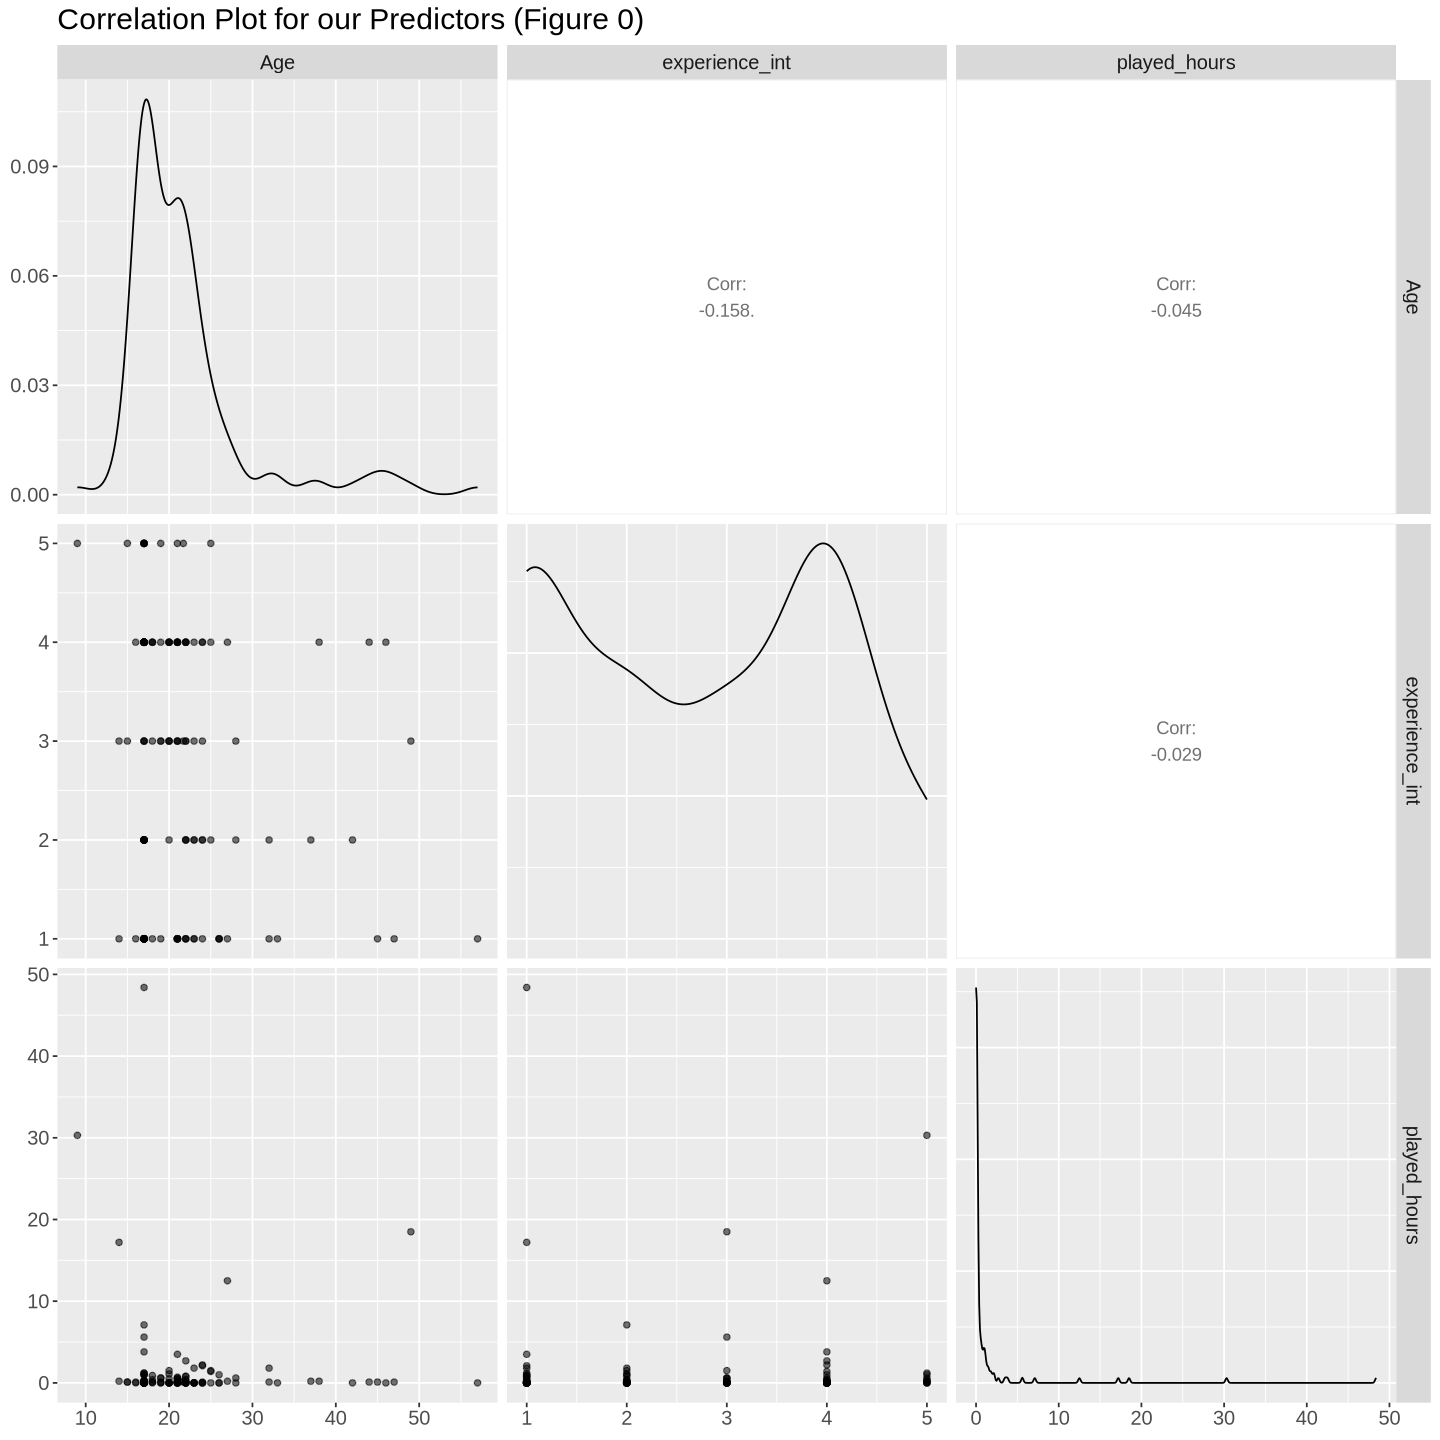

In [80]:
options(repr.plot.width = 12, repr.plot.height = 12)
player_pairplot <- train_processed |> 
                   select(-experience)|>
                   ggpairs(mapping = aes(alpha = 0.4)) +
                   theme(text = element_text(size = 15)) +
                   ggtitle("Correlation Plot for our Predictors (Figure 0)")

# your code here
player_pairplot

### EDA:

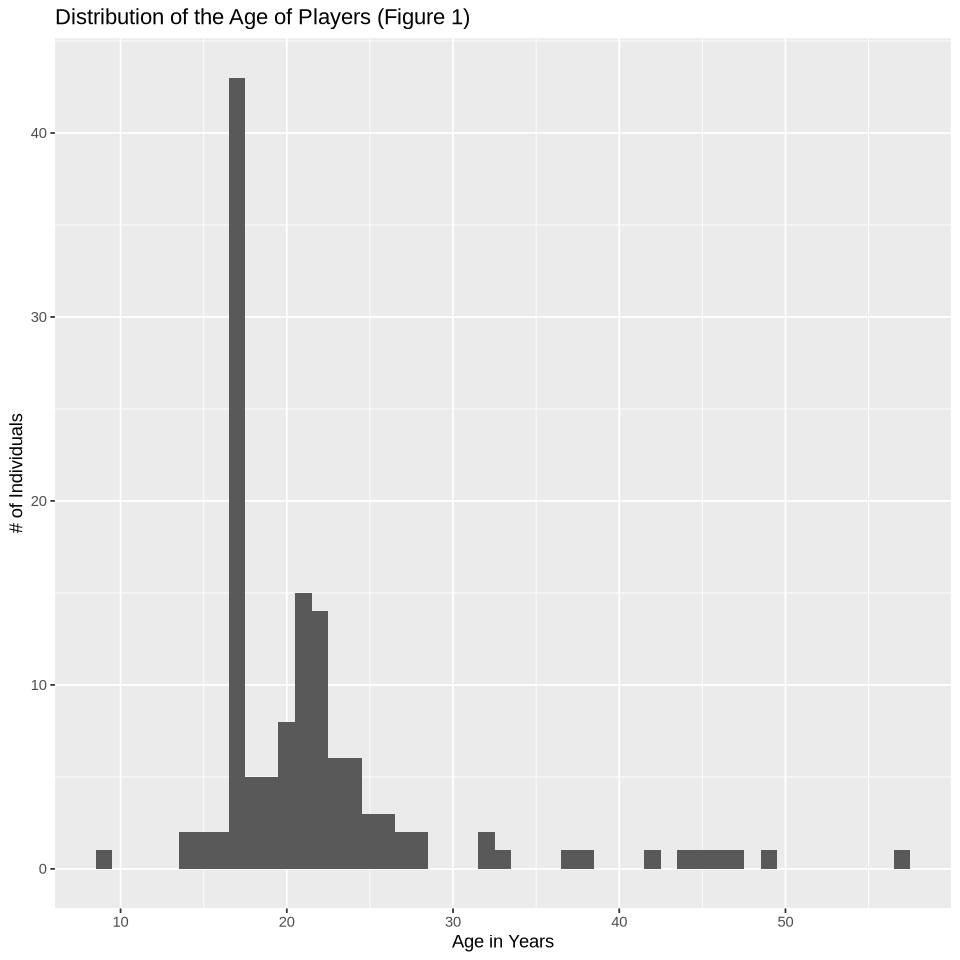

In [81]:
options(repr.plot.width = 8, repr.plot.height = 8)
age_hist <- train_processed |>
            ggplot(aes(x = Age)) +
            geom_histogram(binwidth = 1) +
            labs(title = "Distribution of the Age of Players (Figure 1)",
                 x = "Age in Years",
                 y = "# of Individuals")
age_hist

#### Interpretation of Figure 1
 Figure 1 illustrates the age distribution of players in the dataset. The vast majority of users are between 16 and 28 years old, indicating that the server is primarily used by young adults. Players under 12 and those over 30 are extremely rare, suggesting limited engagement in these age groups. The age distribution exhibits right skewness with a long tail in the older age brackets, indicating that while some older individuals exist in the sample, they represent a small proportion. 

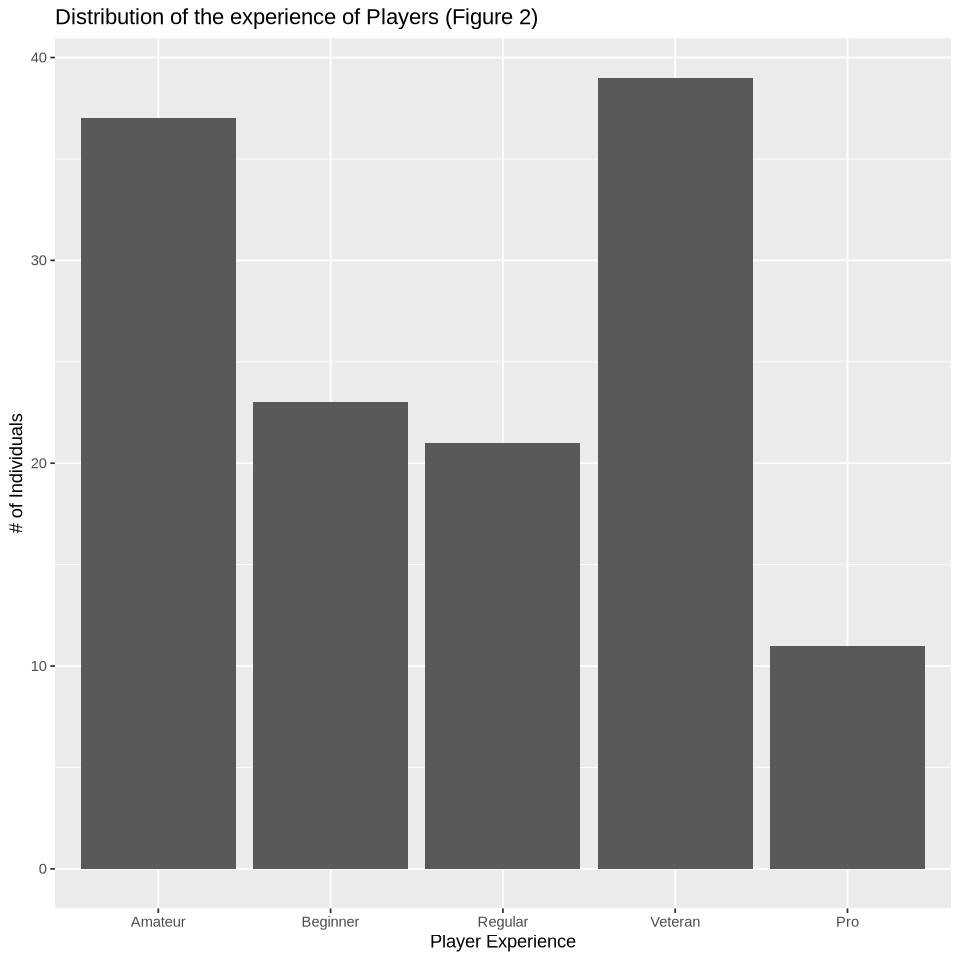

In [82]:
options(repr.plot.width = 8, repr.plot.height = 8)
experience_bar <- train_processed |>
            ggplot(aes(x = experience)) +
            geom_bar() +
            labs(title = "Distribution of the experience of Players (Figure 2)",
                 x = "Player Experience",
                 y = "# of Individuals")
experience_bar

####  Interpretation of Figure 2

Figure 2 illustrates the distribution of players across different experience levels. The largest groups are “Amateur” and “Veteran” indicating that this dataset primarily consists of relatively new and experienced users. In contrast, the “pro” players group is the smallest, suggesting that top-tier players are relatively scarce on this server.

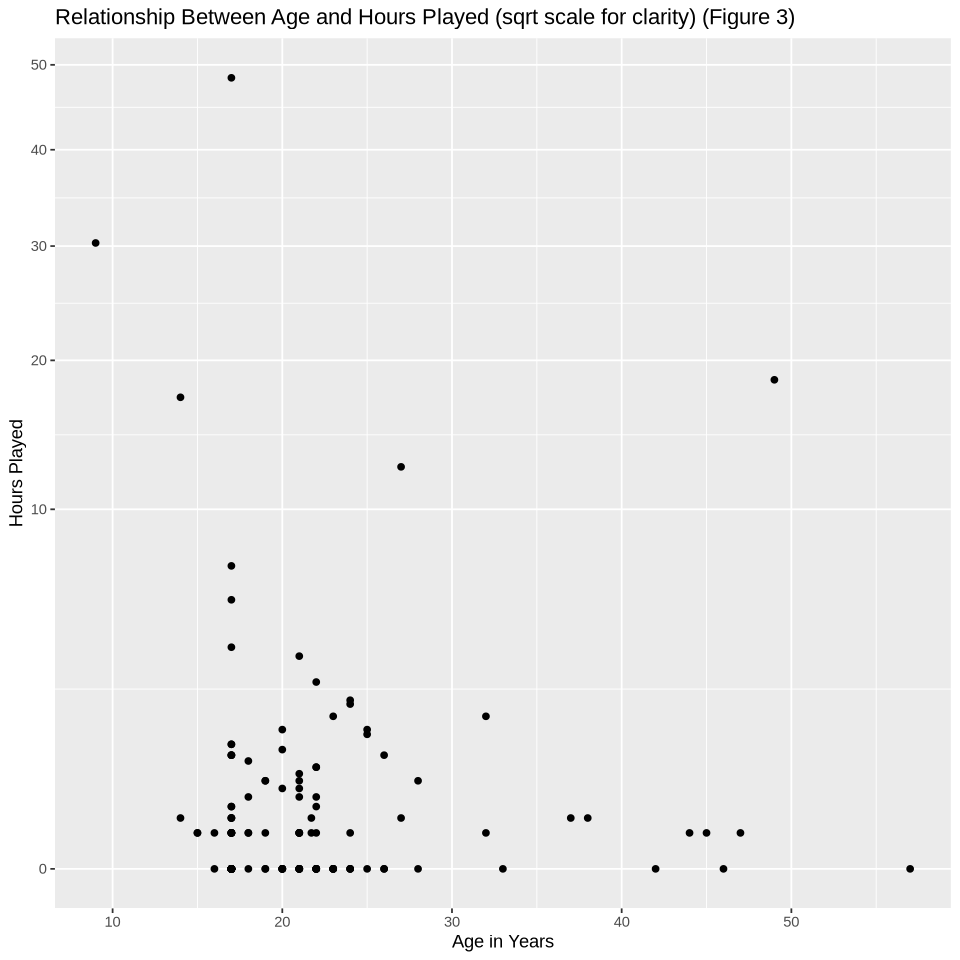

In [85]:
options(repr.plot.width = 8, repr.plot.height = 8)
age_plot <- train_processed |>
            ggplot(aes(x = Age, y = played_hours)) +
            geom_point() +
            scale_y_sqrt() + # using sqrt scale so that the small values are more visible
            labs(title = "Relationship Between Age and Hours Played (sqrt scale for clarity) (Figure 3)",
                 x = "Age in Years",
                 y = "Hours Played")
age_plot

####  Interpretation of Figure 3

Figure 3 visually illustrates the relationship between player age and total gaming duration. Overall, no clear linear correlation exists between these two variables. Players across different age groups predominantly cluster within lower gaming duration ranges. A small minority, particularly those in their teens to early twenties, exhibit exceptionally high gaming durations; however, these appear to be outliers rather than a prevailing trend.

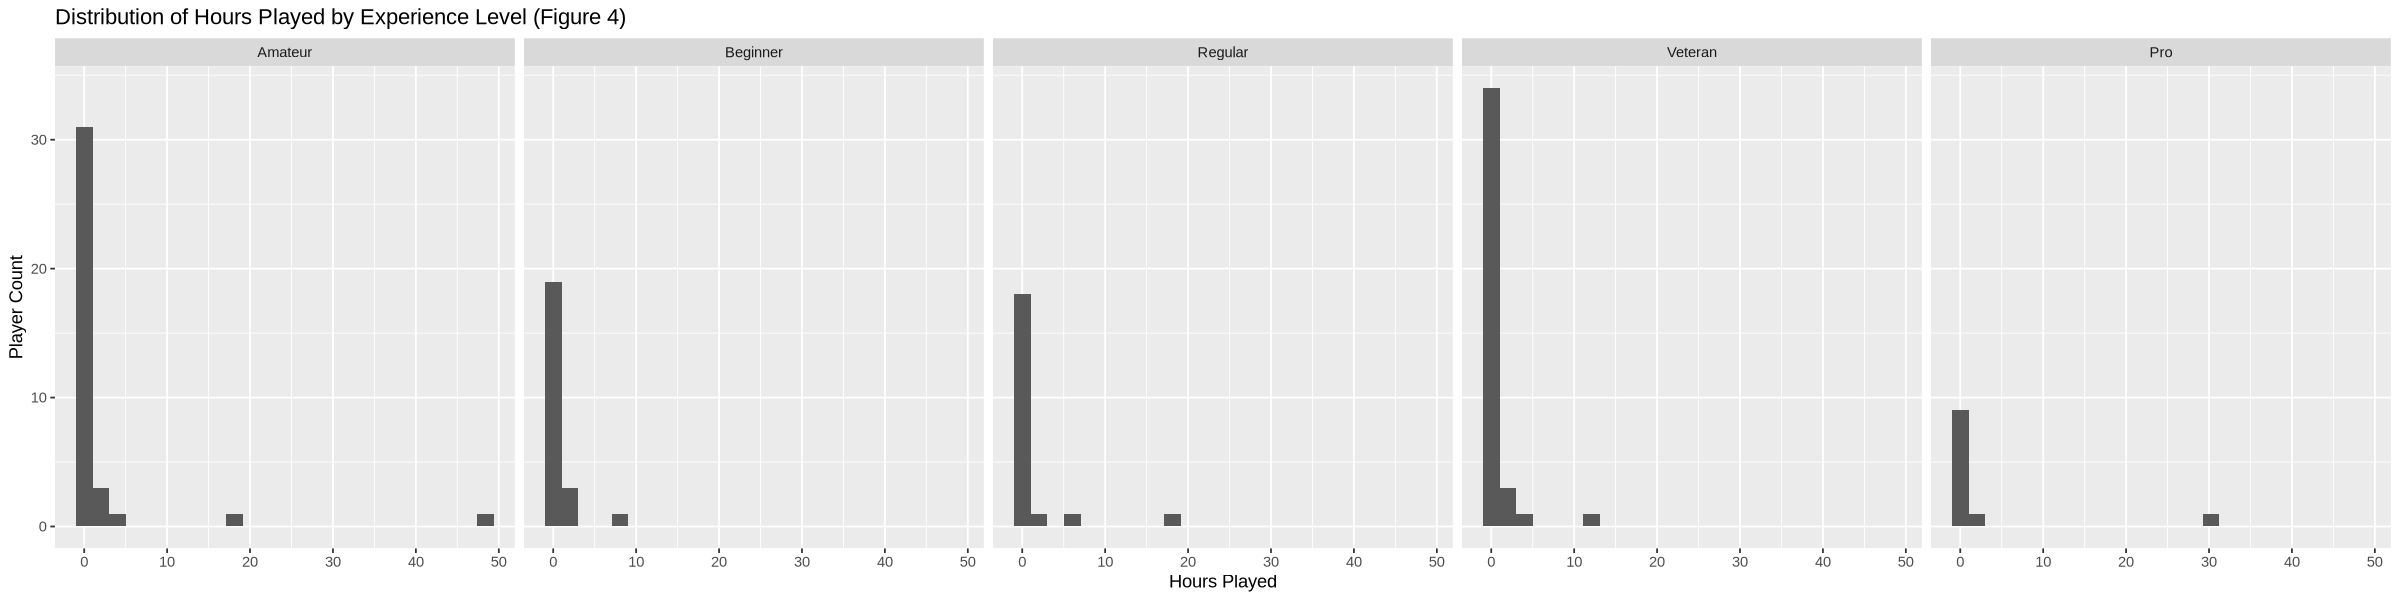

In [86]:
options(repr.plot.width = 20, repr.plot.height = 5)
exp_plot <- train_processed |>
            ggplot(aes(x = played_hours)) + 
            geom_histogram(bins = 25) +
            facet_wrap(~ experience, nrow = 1) +
            labs(title = "Distribution of Hours Played by Experience Level (Figure 4)",
                 x = "Hours Played",
                 y = "Player Count")
exp_plot

####  Interpretation of Figure 4

Figure 4 illustrates the distribution of gameplay duration across different player experience levels. Across all experience categories, the data exhibits a pronounced right-skewed distribution, with the vast majority of players spending between 0 and 10 hours playing. Overall, no clear stepwise increase in total playtime was observed with increasing experience level.

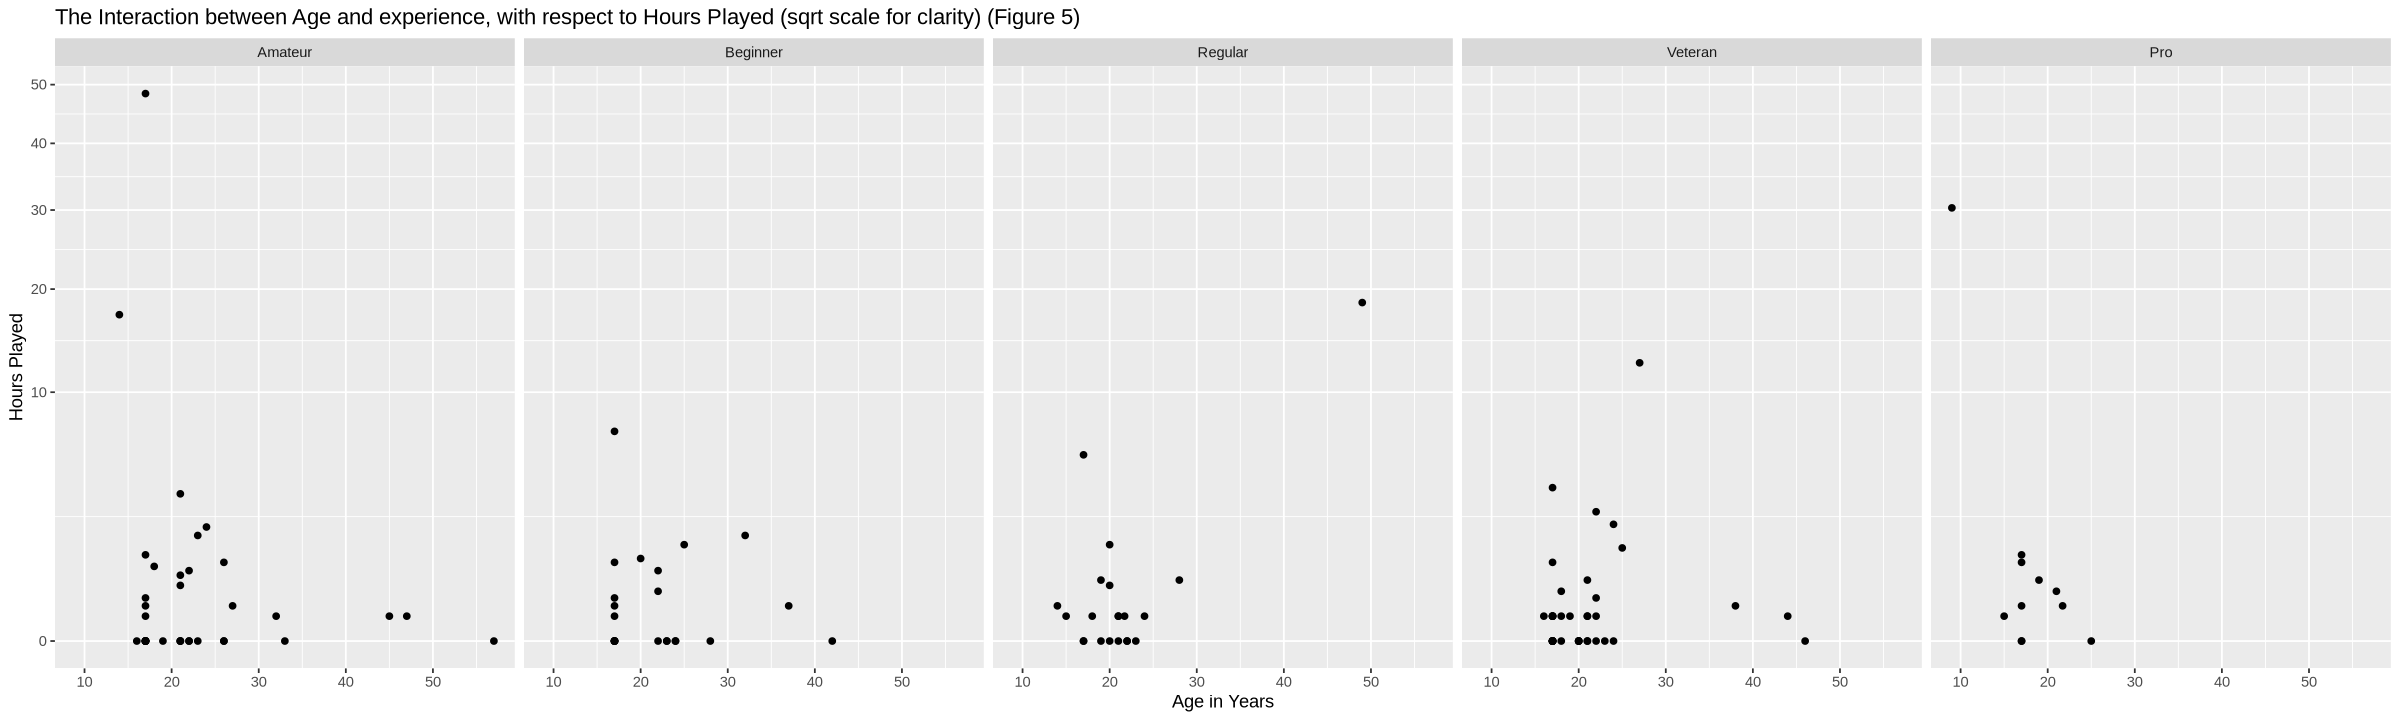

In [87]:
options(repr.plot.width = 20, repr.plot.height = 6)
interaction_plot <- train_processed |>
                    ggplot(aes(x = Age, y = played_hours)) +
                    geom_point() +
                    scale_y_sqrt() + # using sqrt scale so that the small values are more visible
                    facet_wrap(~ experience, nrow = 1) +
                    labs(title = "The Interaction between Age and experience, with respect to Hours Played (sqrt scale for clarity) (Figure 5)",
                         x = "Age in Years",
                         y = "Hours Played")
interaction_plot

####  Interpretation of Figure 5

Figure 5 illustrates the relationship between age and playtime across different experience levels. Overall, data points are highly concentrated in the 10 to 30 year old age range, with the vast majority of points falling within the lower playtime bracket. No significant linear relationship between age and playtime was observed.

### Models:

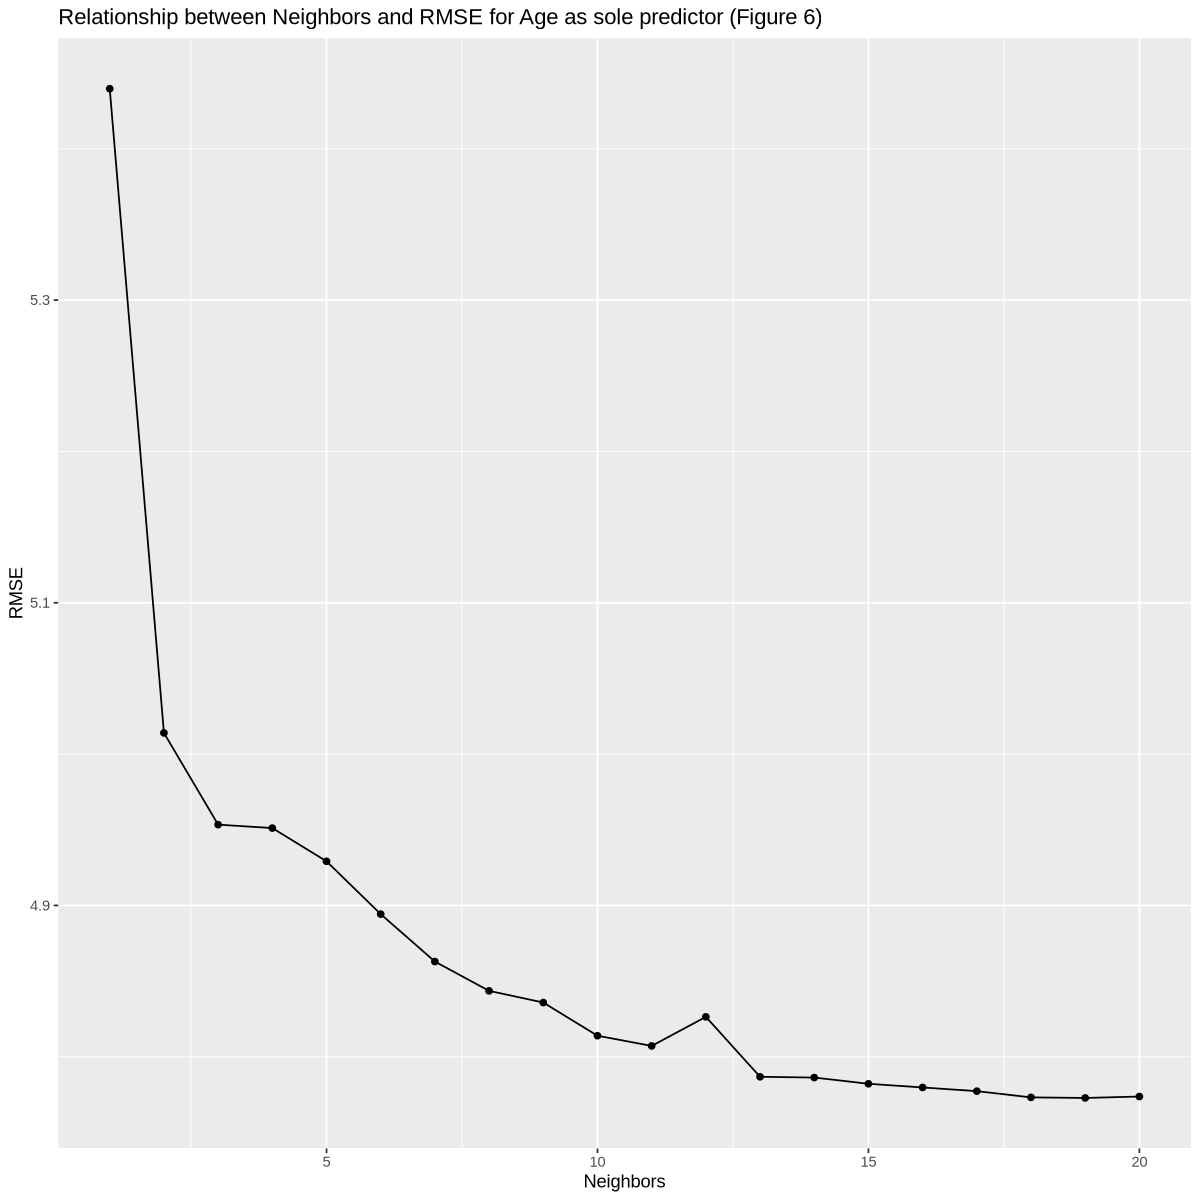

In [101]:
set.seed(42)
# Only using age as a predictor
age_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

age_recipe <- recipe(played_hours ~ Age, data = train_processed) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

age_vfold <- vfold_cv(train_processed, v = 5, strata = played_hours)

age_workflow <- workflow() |> add_recipe(age_recipe) |> add_model(age_spec)

gridvals <- tibble(neighbors = seq(1, 20, by=1))

age_results <- age_workflow |> 
               tune_grid(resamples = age_vfold, grid = gridvals) |> 
               collect_metrics() |>
               filter(.metric == "rmse")

options(repr.plot.width = 10, repr.plot.height = 10)
age_results_plot <- age_results |>
                    ggplot(aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "RMSE", title = "Relationship between Neighbors and RMSE for Age as sole predictor (Figure 6)")
age_results_plot

In [102]:
# Taking the "elbow" of figure 6 so that we can avoid overfitting. Would normally take the k that results in rmse, but rmse keeps decreasing as k increases. So if k == num of samples, that is meaningless.
age_elbow <- 3

age_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = age_elbow) |>
         set_engine("kknn") |>
         set_mode("regression")

age_best_fit <- workflow() |>
         add_recipe(age_recipe) |>
         add_model(age_best_spec) |>
         fit(data = train_processed)

age_summary <- age_best_fit |>
          predict(test_processed) |>
          bind_cols(test_processed) |>
          metrics(truth = played_hours, estimate = .pred)

# your code here
age_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.891444210
rsq,standard,0.001534986
mae,standard,2.038418079


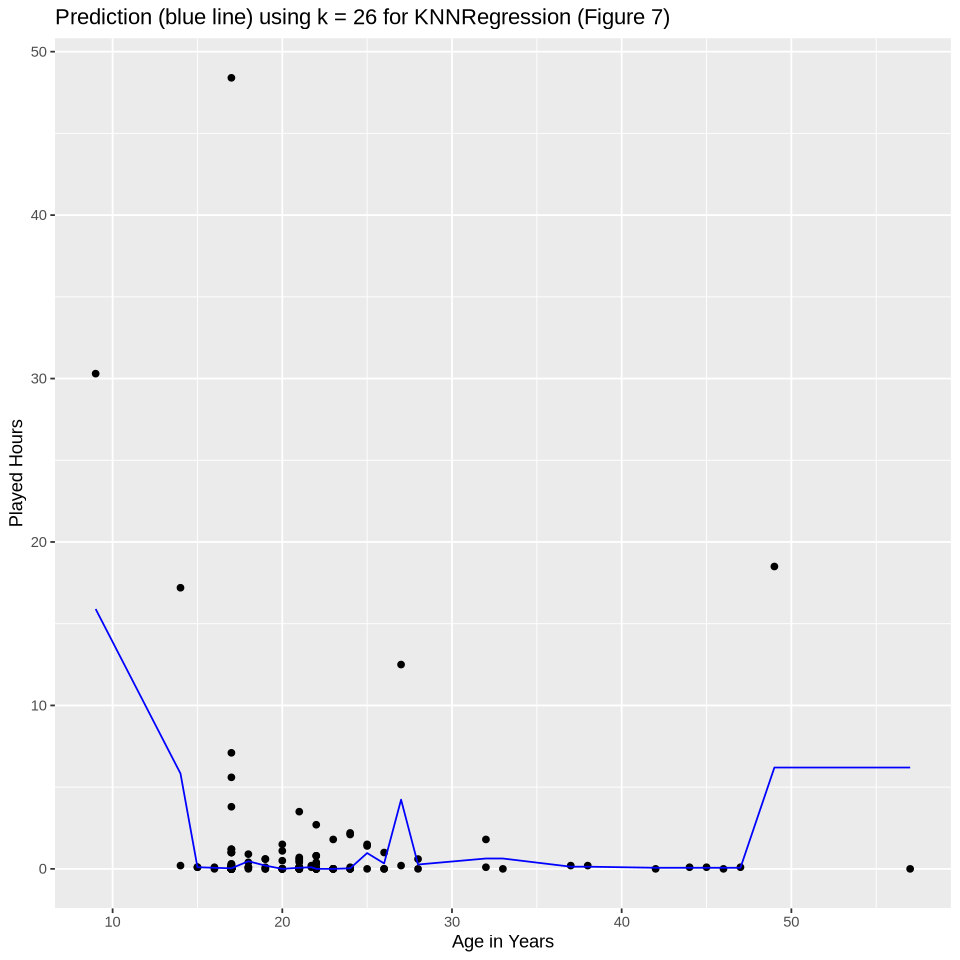

In [103]:
set.seed(42)
options(repr.plot.width = 8, repr.plot.height = 8)
age_preds <- age_best_fit |> predict(train_processed) |> bind_cols(train_processed)
age_plot <- ggplot(age_preds, aes(x = Age, y = played_hours)) +
                    geom_point() +
                    geom_line(data = age_preds,
                             mapping = aes(y = .pred),
                             color = "blue") +
                    labs(x = "Age in Years", y = "Played Hours", title = "Prediction (blue line) using k = 26 for KNNRegression (Figure 7)")
age_plot

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





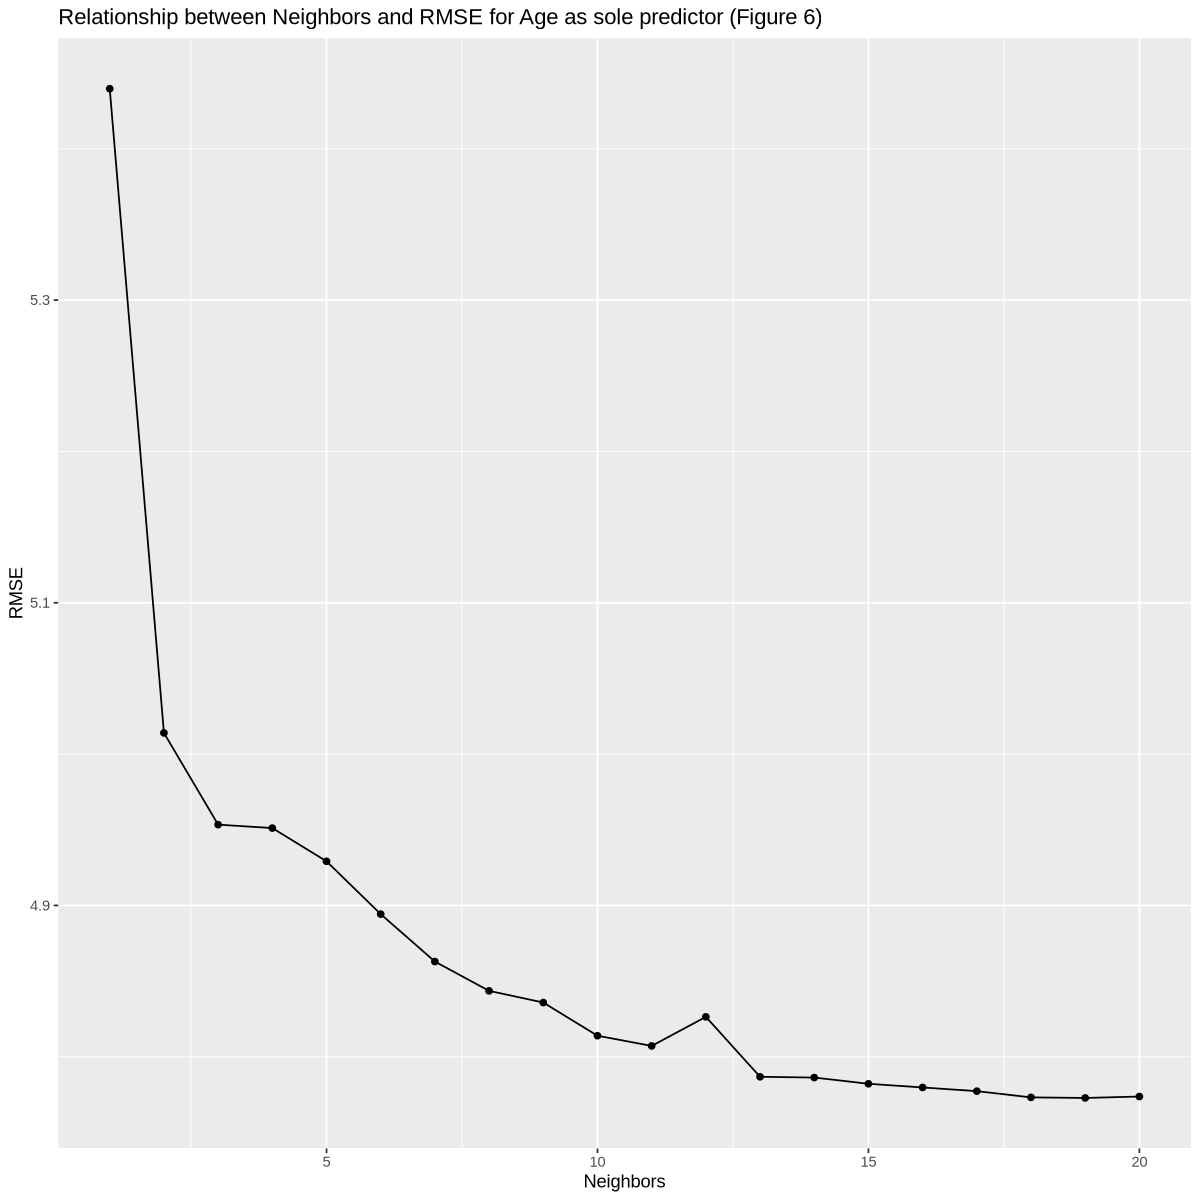

In [104]:
set.seed(42)
# Only using age as a predictor
exp_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

exp_recipe <- recipe(played_hours ~ experience_int, data = train_processed) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

exp_vfold <- vfold_cv(train_processed, v = 5, strata = played_hours)

exp_workflow <- workflow() |> add_recipe(exp_recipe) |> add_model(exp_spec)

gridvals <- tibble(neighbors = seq(1, 20, by=1))

exp_results <- exp_workflow |> 
               tune_grid(resamples = exp_vfold, grid = gridvals) |> 
               collect_metrics() |>
               filter(.metric == "rmse")

options(repr.plot.width = 10, repr.plot.height = 10)
exp_results_plot <- exp_results |>
                    ggplot(aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "RMSE", title = "Relationship between Neighbors and RMSE for Experience as sole predictor (Figure 8)")
age_results_plot

In [105]:
# Taking the "elbow" of figure 6 so that we can avoid overfitting. Would normally take the k that results in rmse, but rmse keeps decreasing as k increases. So if k == num of samples, that is meaningless.
exp_elbow <- 3

exp_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = exp_elbow) |>
         set_engine("kknn") |>
         set_mode("regression")

exp_best_fit <- workflow() |>
         add_recipe(exp_recipe) |>
         add_model(exp_best_spec) |>
         fit(data = train_processed)

exp_summary <- exp_best_fit |>
          predict(test_processed) |>
          bind_cols(test_processed) |>
          metrics(truth = played_hours, estimate = .pred)

# your code here
exp_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.2785284430
rsq,standard,0.0008218494
mae,standard,1.4237288136


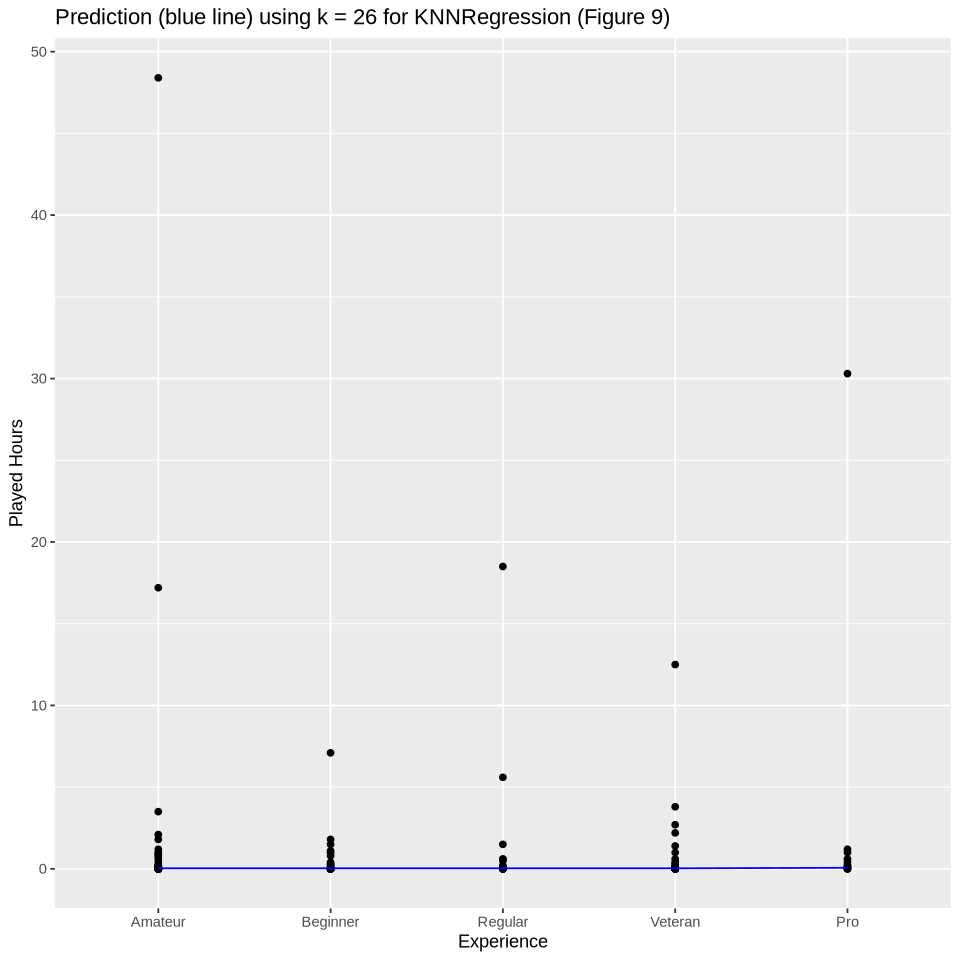

In [113]:
set.seed(42)
options(repr.plot.width = 8, repr.plot.height = 8)
exp_preds <- exp_best_fit |> predict(train_processed) |> bind_cols(train_processed)
exp_plot <- ggplot(exp_preds, aes(x = experience, y = played_hours)) +
                    geom_point() +
                    geom_line(data = exp_preds,
                             mapping = aes(x = experience_int, y = .pred),
                             color = "blue") +
                    labs(x = "Experience", y = "Played Hours", title = "Prediction (blue line) using k = 26 for KNNRegression (Figure 9)")
exp_plot

## Discussion:

### Findings:
- Work in Progress...

### Expectations vs. Reality:
- Work in Progress...

### Impact of our Findings:
- Work in Progress...

### Future Questions:
- Work in Progress...

## References (Optional)